## Code Review

This section covers some tools to automatically review and improve your code such as sorting imports, checking for missing docstrings, etc. 

### isort: Automatically Sort your Python Imports in 1 Line of Code

As your codebase expands, you may find yourself importing numerous libraries, which can become overwhelming to navigate. To avoid arranging your imports manually, use isort.

isort is a Python library that automatically sorts imports alphabetically, grouping them by section and type. 

Consider the following example where your imports are unsorted:

```python
from sklearn.metrics import confusion_matrix, fl_score, classification_report, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import TimeSeriesSplit
```
By running `isort name_of_your_file.py`, isort can sort your imports automatically into the following:

```python
from sklearn import svm
from sklearn.metrics import (classification_report, confusion_matrix, fl_score,
                             roc_curve)
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     TimeSeriesSplit, train_test_split)
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
```

You can use isort with pre-commit by adding the following to your .pre-commit-config.yaml file:

```yaml
-   repo: https://github.com/timothycrosley/isort
    rev: 5.12.0
    hooks:
    -   id: isort
```

[Link to isort](https://github.com/pycqa/isort).

### interrogate: Check your Python Code for Missing Docstrings

In [ ]:
!pip install interrogate  

Sometimes, you might forget to include docstrings for classes and functions. Instead of manually searching through all your functions and classes for missing docstrings, use interrogate.

Consider the following example where there are missing docstrings:

In [2]:
%%writefile interrogate_example.py
class Math:
    def __init__(self, num) -> None:
        self.num = num

    def plus_two(self):
        """Add 2"""
        return self.num + 2

    def multiply_three(self):
        return self.num * 3

Writing interrogate_example.py


You can use interrogate to identify missing docstrings:
```bash
interrogate interrogate_example.py
```
Output:

In [29]:
!interrogate interrogate_example.py

RESULT: FAILED (minimum: 80.0%, actual: 20.0%)


You can use interrogate with pre-commit by adding the following to your .pre-commit-config.yaml file:
```yaml
- repo: https://github.com/pre-commit/mirrors-interrogate
  rev: v1.4.0
  hooks:
  - id: interrogate
```

[Link to interrogate](https://interrogate.readthedocs.io/en/latest/).

### mypy: Static Type Checker for Python


In [ ]:
!pip install mypy 

Type hinting in Python is useful for other developers to understand the expected data types to be used in your functions. To automate type checking in your code, use mypy. 

Consider the following file that includes type hinting:

In [3]:
%%writefile mypy_example.py
from typing import List, Union

def get_name_price(fruits: list) -> Union[list, tuple]:
    return zip(*fruits)

fruits = [('apple', 2), ('orange', 3), ('grape', 2)]
names, prices = get_name_price(fruits)
print(names)  # ('apple', 'orange', 'grape')
print(prices)  # (2, 3, 2)

Writing mypy_example.py


When typing the following command on your terminal:
```bash
mypy mypy_example.py
```
you will get the output similar to this:

In [31]:
!mypy mypy_example.py

mypy_example.py:4: error: Incompatible return value type (got "zip[Any]", expected "Union[List[Any], Tuple[Any, ...]]")
Found 1 error in 1 file (checked 1 source file)


You can use mypy with pre-commit by adding the following to your .pre-commit-config.yaml file:

```yaml
repos:
- repo: https://github.com/pre-commit/mirrors-mypy
  rev: v0.910
  hooks:
  - id: mypy
```

[Link to mypy](https://mypy.readthedocs.io/en/latest/introduction.html).

### Refurb: Refurbish and Modernize Python Codebases

If you want to have some guidelines to improve and optimize your code, try Refurb.

For example, if you have a file like this:

In [4]:
%%writefile test_refurb.py
for n in [1, 2, 3, 4]:
    if n == 2 or n == 4:
        res = n/2 

Overwriting test_refurb.py


You can use Refurb to refurbish your code.

```bash
$ refurb test_refurb.py
```

In [3]:
!refurb test_refurb.py

test_refurb.py:1:10 [FURB109]: Replace `in [x, y, z]` with `in (x, y, z)`
test_refurb.py:2:8 [FURB108]: Use `x in (y, z)` instead of `x == y or x == z`

Run `refurb --explain ERR` to further explain an error. Use `--quiet` to silence this message


```bash
$ refurb test_refurb.py --explain FURB109
```

In [4]:
!refurb test_refurb.py --explain FURB109

['Since tuple, list, and set literals can be used with the `in` operator, it',
 'is best to pick one and stick with it.',
 '',
 'Bad:',
 '',
 '```',
 'for x in [1, 2, 3]:',
 '    pass',
 '',
 'nums = [str(x) for x in [1, 2, 3]]',
 '```',
 '',
 'Good:',
 '',
 '```',
 'for x in (1, 2, 3):',
 '    pass',
 '',
 'nums = [str(x) for x in (1, 2, 3)]',
 '```']

Refurb only works with Python 3.10 and above.

You can use Refurb with pre-commit by adding the following to your .pre-commit-config.yaml file:

```yaml
repos:
  - repo: https://github.com/dosisod/refurb
    rev: REVISION
    hooks:
      - id: refurb
```

[Link to Refurb](https://github.com/dosisod/refurb).

### eradicate: Remove Junk Comments from Python Files

In [ ]:
!pip install eradicate

Outdated or unused code left as comments in Python files can clutter codebases, making them harder to read and maintain. 

Eradicate solves this by automatically identifying and removing commented-out code from Python files.

Let's see eradicate in action:

Example Python file:

In [2]:
%%writefile eradicate_test.py
# from math import *

def mean(nums: list):
    # print(nums)
    # TODO: check if nums is empty
    # Return mean
    return sum(nums) / len(nums)

# nums = [0, 1]
nums = [1, 2, 3]
mean(nums)

Writing eradicate_test.py


Preview changes:

```bash
$ eradicate eradicate_test.py
```

In [3]:
!eradicate eradicate_test.py

--- before/eradicate_test.py
+++ after/eradicate_test.py
@@ -1,11 +1,8 @@
-# from math import *
 
 def mean(nums: list):
-    # print(nums)
     # TODO: check if nums is empty
     # Return mean
     return sum(nums) / len(nums)
 
-# nums = [0, 1]
 nums = [1, 2, 3]
 mean(nums)


Apply changes:

```bash
$ eradicate eradicate_test.py -i
```

In [4]:
!eradicate eradicate_test.py -i

Results:

In [5]:
# show file contents
%cat eradicate_test.py


def mean(nums: list):
    # TODO: check if nums is empty
    # Return mean
    return sum(nums) / len(nums)

nums = [1, 2, 3]
mean(nums)


In this example, eradicate removes:

1. The commented-out import statement `# from math import *`
2. The commented-out debug print statement `# print(nums)`
3. The commented-out variable assignment `# nums = [0, 1]`

However, it preserves the meaningful comments:

1. The TODO comment `# TODO: check if nums is empty`
2. The descriptive comment `# Return mean`

This cleanup improves the code's readability by removing distracting, unused code comments while keeping important notes for developers.

You can use eradicate with pre-commit by adding the following to your `.pre-commit-config.yaml` file:

```yaml
repos:
- repo: https://github.com/wemake-services/eradicate/
  rev: v2.2.0
  hooks:
  - id: eradicate
```

[Link to eradicate](https://github.com/wemake-services/eradicate/).

### Pydantic: Enforce Data Types on Your Function Parameters at Runtime

In [ ]:
!pip install pydantic

To enforce data types and validate function parameters at runtime, use Pydantic. 

Pydantic will attempt to convert values to the correct data type. If the conversion fails, it raises a ValidationError.

In [9]:
from pydantic import BaseModel
import pandas as pd

class SplitConfig(BaseModel):
    test_size: float = 0.3
    random_state: int = 1

In [10]:
def split_data(data: pd.DataFrame, config: SplitConfig = SplitConfig()):
    test_size = config.test_size
    random_state = config.random_state
    ...


split_data(SplitConfig(random_state=1.0)) 
# --> 1 (int)


In [12]:
split_data(SplitConfig(random_state="a"))

ValidationError: 1 validation error for SplitConfig
random_state
  value is not a valid integer (type=type_error.integer)

[Link to Pydantic](https://docs.pydantic.dev/).

[Build a full-stack ML application with Pydantic and Prefect](https://towardsdatascience.com/build-a-full-stack-ml-application-with-pydantic-and-prefect-915f00fe0c62?sk=b1f8c5cb53a6a9d7f48d66fa778e9cf0).

### perfplot: Performance Analysis for Python Snippets

In [ ]:
!pip install perfplot

If you want to compare the performance between different snippets and plot the results, use perfplot. 

Output()

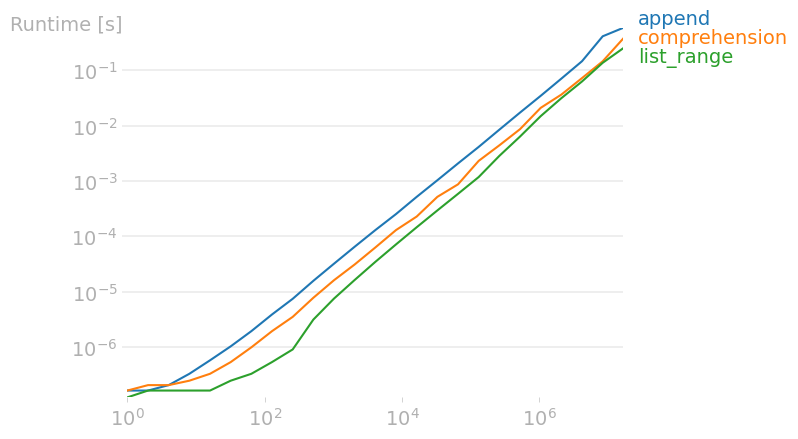

In [14]:
import perfplot


def append(n):
    l = []
    for i in range(n):
        l.append(i)
    return l


def comprehension(n):
    return [i for i in range(n)]


def list_range(n):
    return list(range(n))


perfplot.show(
    setup=lambda n: n,
    kernels=[
        append,
        comprehension,
        list_range,
    ],
    n_range=[2**k for k in range(25)],
)


[Link to perfplot](https://github.com/nschloe/perfplot).

### Analyze the Memory Usage of Your Python Code 

In [ ]:
!pip install memory_profiler

If you want to analyze the memory consumption of your Python code line-by-line, use memory_profiler. This package allows you to generate a full memory usage report of your executable and plot it.

In [5]:
%%writefile memory_profiler_test.py 
from memory_profiler import profile


@profile
def func():
    a = [1] * (10 ** 6)
    b = [2] * (2 * 10 ** 7)
    del b
    return a


if __name__ == "__main__":
    func()


Writing memory_profiler_test.py


```bash
$ mprof run memory_profiler_test.py
``` 

In [1]:
!mprof run memory_profiler_test.py

mprof: Sampling memory every 0.1s
running new process
running as a Python program...
Filename: memory_profiler_test.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     4     41.9 MiB     41.9 MiB           1   @profile
     5                                         def func():
     6     49.5 MiB      7.6 MiB           1       a = [1] * (10 ** 6)
     7    202.1 MiB    152.6 MiB           1       b = [2] * (2 * 10 ** 7)
     8     49.5 MiB   -152.6 MiB           1       del b
     9     49.5 MiB      0.0 MiB           1       return a




Plot the memory usage:
```bash
$ mprof plot
```
![](../img/memory_profiler.png)

[Link to memory_profiler](https://github.com/pythonprofilers/memory_profiler).

### Vulture: Automatically Find Dead Python Code

In [ ]:
!pip install vulture

Unused code poses multiple issues, including:

- Increased difficulty in comprehending the code.
- Challenges in debugging and testing.
- Unnecessary consumption of memory and resources.

To automatically remove unused Python code, use Vulture.

In [ ]:
%%writefile dead_code.py
# Unused Imports
import pandas as pd
import numpy as np

class DataProcessor:
    def __init__(self, data):
        self.data = data

    def clean_data(self):
        # Unused Variables
        how = 'all'
        inplace = True 

        # Data cleaning logic here
        self.data = self.data.dropna(how='any', inplace=False)

    def get_mean(self):
        # This method is defined but not used in the class
        return self.data.mean()

if __name__ == "__main__":
    data = pd.DataFrame({'A': [1, 2, None, 4]})
    
    processor = DataProcessor(data)
    processor.clean_data()


```bash
$ vulture dead_code.py
```

In [11]:
!vulture dead_code.py

dead_code.py:3: unused import 'np' (90% confidence)
dead_code.py:11: unused variable 'how' (60% confidence)
dead_code.py:12: unused variable 'inplace' (60% confidence)
dead_code.py:17: unused method 'get_mean' (60% confidence)


You can use Vulture with pre-commit by adding the following to your .pre-commit-config.yaml file:

```yaml
repos:
  - repo: https://github.com/jendrikseipp/vulture
    rev: 'v2.3'  # or any later Vulture version
    hooks:
      - id: vulture
```

[Link to Vulture](https://github.com/jendrikseipp/vulture).